# Screen capture

In [2]:
import pyscreenshot as ImageGrab

In [3]:
pip install pyscreenshot

Note: you may need to restart the kernel to use updated packages.


In [4]:
def one_time():
    import pyscreenshot as ImageGrab
    import time
    images_folder="captured_images/1/"
    for i in range(0,100):
        time.sleep(8)
        im=ImageGrab.grab(bbox=(60,170,400,550))
        print("saved...",i)
        im.save(images_folder+str(i)+".png")
        print("clear screen now and redraw now")

In [5]:
#Generate Dataset

In [6]:
import cv2
import csv
import glob

header=["label"]
for i in range(0,784):
    header.append("pixel"+str(i))
with open('dataset.csv', 'a') as f:
    writer = csv.writer(f)
    writer.writerow(header)
for label in range(10):
    dirList = glob.glob("captured_images/"+str(label)+"/*.png")
    for img_path in dirList:
        im= cv2.imread(img_path)
        im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
        im_gray = cv2.GaussianBlur(im_gray,(15,15), 0)
        roi= cv2.resize(im_gray,(28,28), interpolation=cv2.INTER_AREA)
       
        data=[]
        data.append(label)
        rows, cols = roi.shape
       
       ## Fill the data array with pixels one by one.
        for i in range(rows):
            for j in range(cols):
                k =roi[i,j]
                if k>100:
                    k=1
                else:
                    k=0
                data.append(k)
        with open('dataset.csv', 'a') as f:
            writer = csv.writer(f)
            writer.writerow(data)

In [7]:
import pandas as pd #pip install pandas
from sklearn.utils import shuffle #pip install scikit-learn
#0,....,1.....,2.....
#5,3,1,0,2,5,.......


data = pd.read_csv('dataset.csv',low_memory=False)
data = shuffle(data)
print(data)

     label pixel0 pixel1 pixel2 pixel3 pixel4 pixel5 pixel6 pixel7 pixel8  \
639      6      0      0      0      0      0      0      0      0      0   
929      9      0      0      0      0      0      0      0      0      0   
2941     8      1      1      1      1      1      1      1      1      1   
2597     5      1      1      1      1      1      1      1      1      1   
1996     9      1      1      1      1      1      1      1      1      1   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2966     8      1      1      1      1      1      1      1      1      1   
767      7      0      0      0      0      0      0      0      0      0   
1576     4      1      1      1      1      1      1      1      1      1   
2428     3      1      1      1      1      1      1      1      1      1   
1481     3      1      1      1      1      1      1      1      1      1   

      ... pixel774 pixel775 pixel776 pixel777 pixel778 pixel779 pixel780  \

In [8]:
X = data.drop(["label"],axis=1)
Y= data["label"]

In [19]:
# X = data.iloc[:, 1:].astype(float)  # all pixel columns as float
# Y = data.iloc[:, 0]  # label column

3


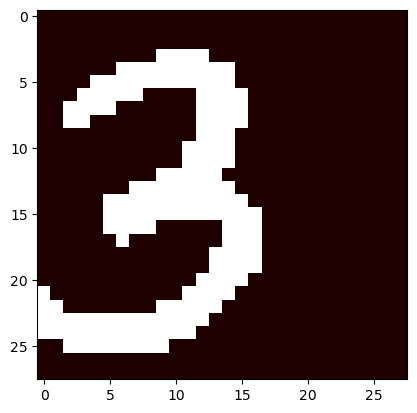

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
idx = 314
img = X.loc[idx].astype(float).values.reshape(28,28)
print(Y[idx])
plt.imshow(img,cmap='pink')

In [11]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y, test_size = 0.2)

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
import joblib

data = pd.read_csv("dataset.csv",low_memory=False)

# Ensure the data has no header row inside the data (sometimes happens when writing multiple times)
data = data[data["label"] != "label"]  # remove any rows that are still headers

# Convert all values to numeric (they may be strings)
data = data.apply(pd.to_numeric)

# Step 2: Split into features and labels
X = data.drop("label", axis=1)
Y = data["label"]

# Step 3: Train/test split
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 4: Train the classifier
classifier = SVC(kernel="linear", random_state=6)
classifier.fit(train_x, train_y)

# Step 5: Save the model
joblib.dump(classifier, "model/digit_recognizer.pkl")

['model/digit_recognizer.pkl']

In [5]:
from sklearn import metrics
prediction=classifier.predict(test_x)
print("Accuracy= ",metrics.accuracy_score(prediction, test_y))

Accuracy=  0.9789303079416531


In [ ]:
#prediction of image drawn in paint
 
import joblib
import cv2
import numpy as np #pip install numpy
import time
import pyscreenshot as ImageGrab
 
model=joblib.load("model/digit_recognizer.pkl")
images_folder="img/"
 
while True:
    img=ImageGrab.grab(bbox=(60,170,400,500))
    img.save(images_folder+"img.png")
    im = cv2.imread(images_folder+"img.png")
    im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    im_gray  =cv2.GaussianBlur(im_gray, (15,15), 0)
   
   #Threshold the image
    ret, im_th = cv2.threshold(im_gray,100, 255, cv2.THRESH_BINARY)
    roi = cv2.resize(im_th, (28,28), interpolation  =cv2.INTER_AREA)
   
    rows,cols=roi.shape
   
    X = []
   
   ##  Fill the data array with pixels one by one.
    for i in range(rows):
        for j in range(cols):
            k = roi[i,j]
            if k>100:
                k=1
            else:
                k=0
            X.append(k)
           
    predictions  =model.predict([X])
    print("Prediction:",predictions[0])
    cv2.putText(im, "Prediction is: "+str(predictions[0]), (20,20), 0, 0.8,(0,255,0),2,cv2.LINE_AA)
   
    cv2.startWindowThread()
    cv2.namedWindow("Result")
    cv2.imshow("Result",im)
    cv2.waitKey(10000)
    if cv2.waitKey(1)==13: #27 is the ascii value of esc, 13 is the ascii value of enter
        break
cv2.destroyAllWindows()

C:\Users\CHATHANYA\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 7


C:\Users\CHATHANYA\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\CHATHANYA\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 2


C:\Users\CHATHANYA\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\CHATHANYA\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 4


C:\Users\CHATHANYA\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\CHATHANYA\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 5


C:\Users\CHATHANYA\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\CHATHANYA\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\CHATHANYA\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\CHATHANYA\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 5


C:\Users\CHATHANYA\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\CHATHANYA\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\CHATHANYA\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\CHATHANYA\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\CHATHANYA\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\CHATHANYA\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\CHATHANYA\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\CHATHANYA\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 7


C:\Users\CHATHANYA\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 7


C:\Users\CHATHANYA\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 8


C:\Users\CHATHANYA\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 8


C:\Users\CHATHANYA\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 5


C:\Users\CHATHANYA\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 8


C:\Users\CHATHANYA\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 5


C:\Users\CHATHANYA\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 4


C:\Users\CHATHANYA\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 8


C:\Users\CHATHANYA\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 8


C:\Users\CHATHANYA\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 5


C:\Users\CHATHANYA\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 5


C:\Users\CHATHANYA\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 5


C:\Users\CHATHANYA\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
